# Bidirectional LSTM

It is used for ```sequence to sequence``` model. You need equal size of input and output shape.

In [1]:
import random as random
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_sequence(length):
    freq = 5
    noise = [random.uniform(-0.3,0.3) for i in range(length)]
    sequence = [np.sin(2 * np.pi * freq * (i/length)) for i in range(length)]
    signal = np.array(noise) + np.array(sequence)
    return signal

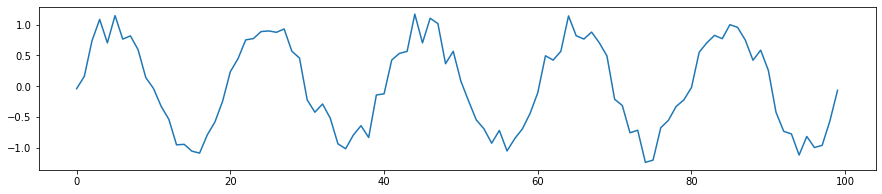

In [3]:
# Plot sequence
sequence = get_sequence(100)
plt.figure(figsize = [15,3])
plt.plot(sequence)
plt.show()


In [30]:
def generate_examples(length, n_samples, output):
    
    X, y = list(), list()
    
    for k in range(n_samples):
        
        sequence = get_sequence(length + output)
        
        X.append(sequence[:-output])
        y.append(sequence[-output:])
        
    X = np.array(X).reshape(n_samples, length,1)
    y = np.array(y).reshape(n_samples, output)
    
    return X, y

In [31]:
X,y = generate_examples(length=100, n_samples=50, output=100)

In [32]:
X.shape, y.shape

((50, 100, 1), (50, 100))

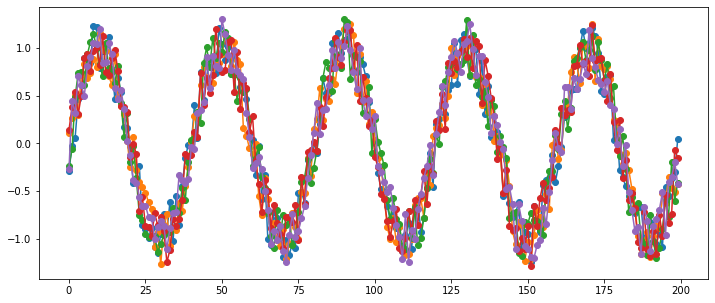

In [33]:
plt.figure(figsize =(12,5))
X, y = generate_examples(100, 5,100)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o') 
plt.show() 

### Model

![img](https://lh5.googleusercontent.com/glWMVLJyG4ZSLidw9Bb0d58IvJccRdD-Hb8Luw1nHB8tsamrGXl2oeC1dk7dhIhnBnaPxbBnr2SysIjbgxOn9VbUw6EeCGNX66cYZF0EtslhRlucHYL5jSPcKLTAbnPQ79MT8A)

In [34]:
# Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import LSTM,TimeDistributed,Dense
from keras.layers import Bidirectional
#from keras.optimizers import Adam

In [38]:
# configure problem
sequence_length = 100
cell_unit = 64
output_length = 25

In [53]:
# define model
model = Sequential(name ='bidirectional-lstm')


model.add(Bidirectional(LSTM(64,return_sequences=True,\
               input_shape=(sequence_length, 1),\
               name='input-layer')))


model.add(LSTM(64,return_sequences=False,\
               name='middle-layer'))


model.add(Dense(output_length))


# compile
model.compile(loss='mean_squared_error',\
              optimizer='rmsprop',\
              metrics='accuracy')

In [67]:
model.summary()

Model: "bidirectional-lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 100, 128)         33792     
 nal)                                                            
                                                                 
 middle-layer (LSTM)         (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
Total params: 84,825
Trainable params: 84,825
Non-trainable params: 0
_________________________________________________________________


In [60]:
#First Layer
n = 1 #input vetor x
m = 10 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

480


In [61]:
#Middle Layer
n = 10 #input vetor x
m = 10 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

840


In [62]:
#Dense Layer
n = 10 #input vetor x
m = 25 # output vector size also equal to number of bias

parameters = n*m + m
print(parameters)

275


Note that output of last LSTM is considerd for dense layer

### Train the Model

In [54]:
sequence_length = 100
output_length = 25

In [55]:
X, y = generate_examples(sequence_length, 1000, output_length)
XX,yy = generate_examples(sequence_length, 200, output_length)

In [56]:
X.shape, y.shape

((1000, 100, 1), (1000, 25))

In [57]:
history=model.fit(X, y,\
                  batch_size=10,\
                  validation_data = (XX,yy),\
                  epochs=5)

Epoch 1/5
100/100 [==============================] - 11s 73ms/step - loss: 0.0517 - accuracy: 0.2540 - val_loss: 0.0329 - val_accuracy: 0.3150
Epoch 2/5
100/100 [==============================] - 6s 63ms/step - loss: 0.0316 - accuracy: 0.2800 - val_loss: 0.0309 - val_accuracy: 0.2250
Epoch 3/5
100/100 [==============================] - 6s 63ms/step - loss: 0.0312 - accuracy: 0.2730 - val_loss: 0.0305 - val_accuracy: 0.3150
Epoch 4/5
100/100 [==============================] - 6s 63ms/step - loss: 0.0311 - accuracy: 0.2810 - val_loss: 0.0308 - val_accuracy: 0.2250
Epoch 5/5
100/100 [==============================] - 6s 62ms/step - loss: 0.0310 - accuracy: 0.2810 - val_loss: 0.0305 - val_accuracy: 0.2250


In [58]:
print(history.history)

{'loss': [0.05169924721121788, 0.03159678354859352, 0.031218577176332474, 0.03108063153922558, 0.030975177884101868], 'accuracy': [0.2540000081062317, 0.2800000011920929, 0.27300000190734863, 0.2809999883174896, 0.2809999883174896], 'val_loss': [0.03292519226670265, 0.030925028026103973, 0.030509991571307182, 0.030835773795843124, 0.030538488179445267], 'val_accuracy': [0.3149999976158142, 0.22499999403953552, 0.3149999976158142, 0.22499999403953552, 0.22499999403953552]}


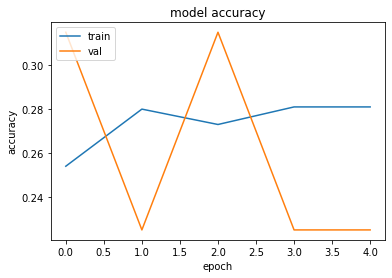

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

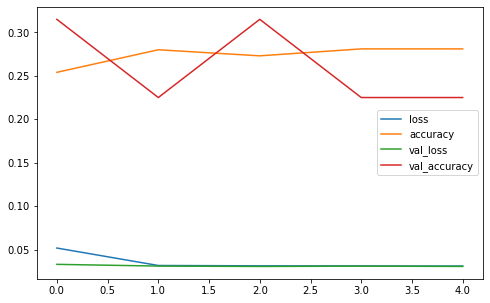

In [60]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Test the model

In [61]:
X, y = generate_examples(sequence_length, 100, output_length) 
loss = model.evaluate(X, y, verbose=0)
loss

[0.03145355358719826, 0.1899999976158142]

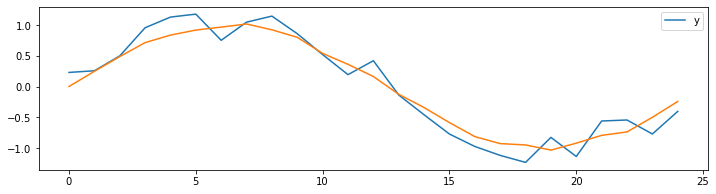

In [62]:
# prediction on new data
X, y = generate_examples(sequence_length, 1, output_length) 
yhat = model.predict(X, verbose=0)

plt.figure(figsize = [12,3])
plt.plot(y[0], label='y') 
plt.plot(yhat[0]) 
plt.legend()
plt.show()


In [63]:
yhat[0].shape, y[0].shape

((25,), (25,))

- Note: There are 100 plots of y-hat. Each LSTM produce a output that goes to dense layer.

### Weight Matrices

In [64]:
for array in model.layers[0].get_weights():
    print (array.shape)

(1, 256)
(64, 256)
(256,)
(1, 256)
(64, 256)
(256,)


In [65]:
for array in model.layers[1].get_weights():
    print (array.shape)

(128, 256)
(64, 256)
(256,)


In [66]:
for array in model.layers[2].get_weights():
    print (array.shape)

(64, 25)
(25,)
